In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [101]:
len(df['Purchase'].unique())

18105

In [3]:
df['Purchase'] = round(df['Purchase']/75.98,2)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,110.16
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,200.05
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,18.72
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,13.91
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,104.88


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,121.926397
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,66.110366
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,0.160000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,76.640000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,105.910000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,158.650000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,315.360000


In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
set(list(df.Product_Category_2.unique()))

{nan,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0}

In [8]:
df.Product_Category_2.fillna(18, inplace = True)

In [9]:
set(list(df.Product_Category_3.unique()))

{nan,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0}

In [10]:
df.Product_Category_3.fillna(18, inplace = True)

In [11]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 50.4+ MB


In [13]:
y = df['Purchase']

In [14]:
X = df.drop(columns = ['Purchase'], axis = 1)

In [15]:
X

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,18.0,18.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,18.0,18.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,18.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,18.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,18.0,18.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,18.0,18.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,18.0,18.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,18.0,18.0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [17]:
le = LabelEncoder()

In [18]:
X = X.apply(le.fit_transform)

In [19]:
X.Gender = pd.to_numeric(X.Gender)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null int64
Gender                        550068 non-null int64
Age                           550068 non-null int64
Occupation                    550068 non-null int64
City_Category                 550068 non-null int64
Stay_In_Current_City_Years    550068 non-null int64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
dtypes: int64(11)
memory usage: 46.2 MB


In [21]:
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components = 'mle', svd_solver='full', random_state = 12)

In [24]:
principal_components = pca.fit_transform(X)

In [25]:
pca.explained_variance_ratio_

array([7.35038107e-01, 2.64934920e-01, 1.11947147e-05, 1.09667649e-05,
       2.32735131e-06, 1.32968158e-06, 4.77176859e-07, 4.29324636e-07,
       1.45826956e-07, 5.56866110e-08])

In [26]:
component_df = pd.DataFrame(principal_components, columns = ['Component_1','Component_2','Component_3','Component_4',
                                                            'Component_5','Component_6','Component_7','Component_8','Component_9',
                                                            'Component_10'])

In [27]:
component_df

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
0,2931.106545,-1084.784323,-3.755083,3.513769,-4.592146,1.170579,-2.491168,-0.093475,0.742045,0.034873
1,2959.686566,618.966809,8.454643,-2.121649,-0.984129,-0.015147,-2.474407,-0.091585,0.805718,0.036050
2,2934.125509,-904.807071,-7.215248,5.058641,3.444470,0.129217,-2.694777,-0.091729,0.732156,0.034335
3,2933.722934,-928.805878,-4.207689,3.692769,4.831858,-1.619860,-2.694272,-0.094633,0.741054,0.034295
4,2964.691739,976.943761,-1.942808,9.328395,0.074901,0.848868,3.220366,2.226064,-0.607122,0.838903
...,...,...,...,...,...,...,...,...,...,...
550063,-2902.509842,1908.484876,-7.177675,8.895954,10.731911,-0.429887,2.018691,-0.691649,0.285406,-0.241198
550064,-2904.493793,1909.517645,-12.126180,-2.091589,10.660653,-0.419840,-0.828626,1.254677,-1.008258,0.307306
550065,-2905.492322,1909.535023,-6.340425,10.657222,10.681197,-0.415408,-1.133592,2.130967,0.049542,-0.698469
550066,-2907.493499,1909.568097,-12.136456,-2.005063,10.735486,-0.443231,3.165991,0.462673,-0.640533,0.822967


In [28]:
kf= KFold(35, shuffle = True, random_state= 10)

In [86]:
for a,b in kf.split(component_df):
    X_train, X_test = X_scaled[a], X_scaled[b]
    y_train, y_test = y[a], y[b]

### Random Froest Regressor

In [30]:
rand_for = RandomForestRegressor()

In [31]:
rand_for.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
print('RandomForestRegression score: ',rand_for.score(X_train, y_train))

RandomForestRegression score:  0.958664909416622


In [33]:
y_pred = rand_for.predict(X_train)
y_pred = y_pred.reshape(-1,1)

In [34]:
list(rand_for.feature_importances_)

[0.11393832264498065,
 0.08087371540063638,
 0.009254420348788591,
 0.029081094293317022,
 0.04849920459436937,
 0.0150998711380568,
 0.029581931242656928,
 0.010789460848705372,
 0.6365119159555018,
 0.013760069259001566,
 0.012609994273985611]

In [35]:
rand_for.score(X_test, y_test)

0.7099156374923583

In [36]:
y_actual_pred = rand_for.predict(X_test)

In [37]:
rmse = mean_squared_error(y_test, y_actual_pred)
rmse

1259.2212834608513

In [38]:
rmse = np.sqrt(rmse)
rmse

35.48550807669028

In [39]:
rand_for = RandomForestRegressor(n_estimators=200, random_state=10)

In [40]:
rand_for.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [41]:
print('RandomForestRegression score: ',rand_for.score(X_train, y_train))

RandomForestRegression score:  0.9595484686808932


In [42]:
rand_for.score(X_test, y_test)

0.7111812651032341

In [43]:
y_pred = rand_for.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)

In [45]:
rmse = np.sqrt(mse)
rmse

35.40801246072177

In [ ]:
import pickle

In [ ]:
filename = '2690.43_rmse_model'

In [ ]:
pickle.dump(rand_for,open(filename,"wb"))

In [ ]:
list(y_test)[:10]

In [47]:
list(y_pred)[:10]

[6376.805,
 13104.055,
 8248.24,
 10926.975,
 14264.47,
 7171.6,
 6674.335,
 6132.185,
 9025.23,
 6277.89]

In [6]:
model = pickle.load(open('2690.43_rmse_model','rb'))

In [46]:
y_test_dataframe = pd.DataFrame(y_test)
y_test_dataframe.reset_index(drop = True, inplace = True)
y_test_dataframe.rename(columns = {'Purchase':'Actual Value'}, inplace = True)
y_test_dataframe.head()

,Actual Value
0,69.15
1,258.15
2,129.93
3,156.98
4,252.33


In [47]:
y_pred_dataframe=pd.DataFrame(y_pred)
y_pred_dataframe.reset_index(drop = True, inplace = True)
y_pred_dataframe.rename(columns = {0:'Predicted Value'}, inplace = True)
y_pred_dataframe.head()

,Predicted Value
0,84.34595
1,171.94205
2,109.59850
3,141.49565
4,181.80940


In [48]:
combined_df = y_test_dataframe.merge(y_pred_dataframe, left_index = True, right_index = True)
combined_df.head()
combined_df.shape

(15716, 2)

In [50]:
empty_list = []
for i in range(1,15716):
    if abs(combined_df['Actual Value'][i]-combined_df['Predicted Value'][i]) < 40:
        empty_list.append(i)

In [51]:
len(empty_list)

12477

In [52]:
len(empty_list)/15716*100

79.39043013489437

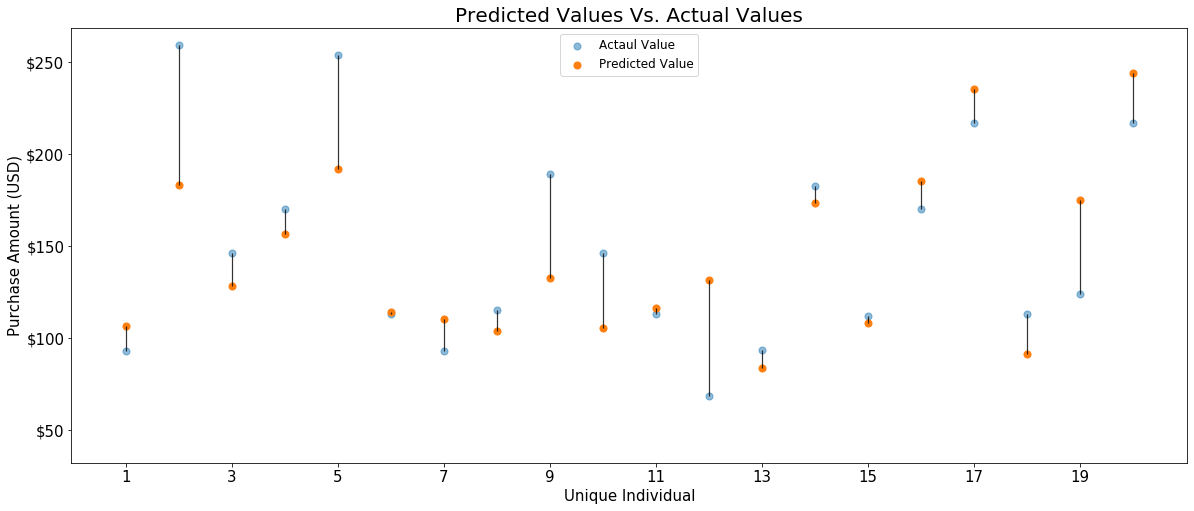

In [52]:
plt.figure(figsize = (20,8))
plt.scatter(y = combined_df['Actual Value'][:20], x = range(1,21), alpha = 0.5, s = 50, label='Actaul Value')
plt.scatter(y = combined_df['Predicted Value'][:20], x = range(1,21), s = 50, label = 'Predicted Value')
plt.vlines(x= range(1,21), ymin=combined_df['Predicted Value'][:20], ymax = combined_df['Actual Value'][:20],
          linestyle = 'solid', alpha =0.8, lw = 1.2)
plt.xticks(range(1,21,2), fontsize = 15)
plt.yticks(np.arange(6),['$50','$100','$150','$200','$250'])
plt.yticks(np.arange(20,250, 57))
plt.yticks(fontsize = 15)
plt.xlabel('Unique Individual', fontsize = 15)
plt.ylabel('Purchase Amount (USD)', fontsize = 15)
plt.title('Predicted Values Vs. Actual Values',fontsize = 20)
plt.legend(loc = 'upper center', fontsize = 12)
plt.show()

### Polynomial Regression

In [97]:
lr = LinearRegression()

In [98]:
poly = PolynomialFeatures()

In [99]:
poly.fit(X_train)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [100]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lr.score(X_test,y_test)

0.14494895460233803

In [102]:
y_lr_pred = lr.predict(X_test)

In [103]:
mean_squared_error(y_test,y_lr_pred)

21427353.93894182

In [104]:
np.sqrt(_)

4628.968993084942

In [111]:
y_lr_pred = pd.DataFrame(y_lr_pred)
y_lr_pred.rename(columns = {0:'Predicted Value'},inplace = True)
y_lr_pred

,Predicted Value
0,8806.062922
1,11589.201938
2,8248.279197
3,11279.096023
4,11377.531000
...,...
15711,3517.504795
15712,3980.743439
15713,3001.518249
15714,2600.736273


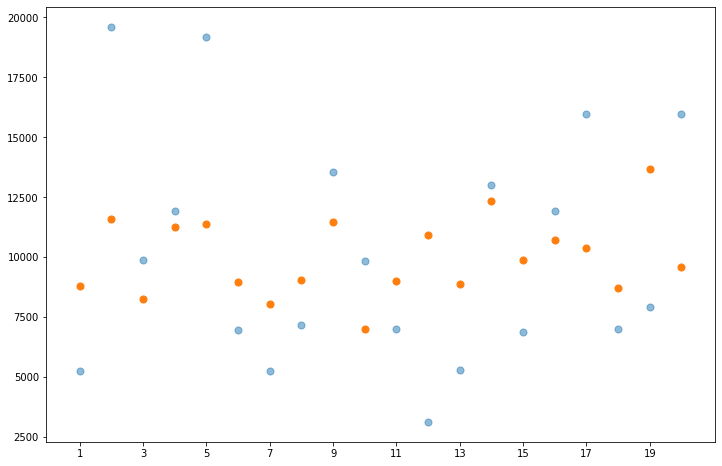

In [134]:
plt.figure(figsize = (12,8))
plt.scatter(y = combined_df['Actual Value'][:20], x = range(1,21), alpha = 0.5,s = 50)
plt.scatter(y = y_lr_pred['Predicted Value'][:20], x = range(1,21), s = 50)
plt.xticks(range(1,21,2))
plt.show()